# Example 2: The `mm2SANS` `Probe` class

The `Probe` class describes all settings specific to a particular SANS experiment.

Most importantly, it combines the properties of `Detector` (specifying size and layout of the SANS detector) and `Beamline` (setting neutron wavelegth, neutron polarisation, and orientation of coordinate systems) objects to calculate the $q$-map, as well as the neutron polarisation $\vec{P}$ within the beamline coordinate system $U$, $V$, $W$.

To specify the rotations of the sample and the sample environment the the fields `Probe.Beamline.sample_rotations` and `probe.Beamline.sample_environment_rotations`, respectively, are used. As this is a headache on its own, find details and explanations in the corresponding example notebook.

## Things you can do with a `Probe` object

- Modify the $\vec{Q}$ map, e.g. select a region of interest or thin out the values to evaluate in order to execute the code faster. 
- You can also set up a log-scale $\vec{Q}$ map using the `Detector.calc_log_qmap` function. Note that it does not make sense to go to $q$ ranges that correspond to distances  lower than the mean distance in your real-space mesh, though.
- Vary the sample or sample environment orientation, and re-calculate the transformation matrices. This allows to e.g. simulate rocking curves.

In [1]:
import mm2SANS

In [2]:
probe = mm2SANS.Probe(
                  sans_instrument='test'
                , neutron_wavelength=6e-10 # in m
                , detector_distance=15 # in m
                , neutron_polarisation=(1,0,0) # U || along beam, V & W in detector plane
                , qmap_disorder=0.35 # to avoid Fourier transform artefacts
               )

In [3]:
# print detector properties
probe.Detector.print_detector_info()

test detector has 64.0 x 64.0 pixels with a size of 15.00 mm x 15.00 mm.


In [4]:
# print beamline settings
probe.Beamline.print_beamline_settings()

Neutron wavelength = 6.0 Angstrom, detector distance = 15 m
Neutron polarisation set to [1. 0. 0.] in sample environment coordinate system (u, v, w), 


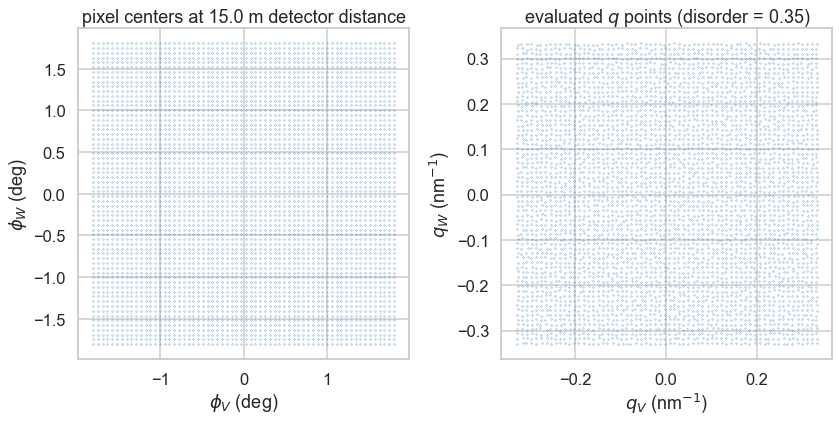

In [5]:
# plot detector map
probe.plot_qmap()